# 03wk-1: (회귀, 로지스틱) – 파이토치식 코딩패턴 (2), 로지스틱 모형

최규빈  
2025-03-19

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/03wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-ylrDsOtm_ovOIp3OPakl7I&si=j_9Nq2CuQ4fC7fT9>

# 2. Imports

In [1]:
import torch
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 파이토치식 코딩패턴 (2)

*복습(잔소리)*

In [6]:
# 로드맵
# 회귀/로지스틱 -> DNN -> CNN 
# 파이토치식 코딩패턴: step1~4 
# step1: 도메인전문가,통계 step2 통계 step3 컴공 step4 산공
# 모델링(비통계): X--> y 가는 패턴을 찾는거다.. // 추세선찾는것 
# 관측자료 (x,y) -- with error 
# 추세선(underlying) --  (x,yhat=X@W) with out error 
# 모델링: 에러가포함된 자료에서 error-free 한 structure를 찾는것 
# 모델링의 철칙: error-free 한 structure를 찾으려고 노력해야지.. error를 따라가려고 노력하면 X 
# 오차: error-free한 스트럭쳐(모델)이랑 실제관측데이터의 갭이 있는데, 이 갭을 설명해주는 역할을 함 

*데이터*

In [7]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

## A. bias의 사용

*net에서 bias를 사용*

In [33]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=1,
    out_features=1,
    bias=True
) # net(x) = x@net.weight.T + net.bias 
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(x)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [34]:
net.bias.data, net.weight.data

`#`

## B. 잘못된(?) 코드

In [35]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화

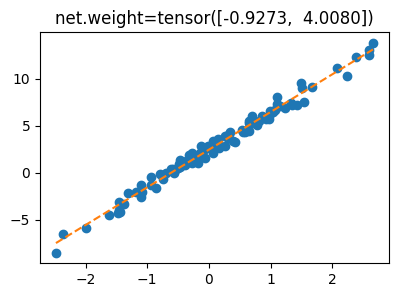

In [39]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

`-` 나쁘지 않은 이유?

In [ ]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
yhat = net(X) = X@net.weight.T + net.bias

In [144]:
net.weight

In [145]:
net.bias

# 4. 로지스틱 모형

## A. $\hat{\bf y} = ??$

`-` ${\bf X}$를 가지고 ${\bf y}$를 맞추는 아래와 같은 문제

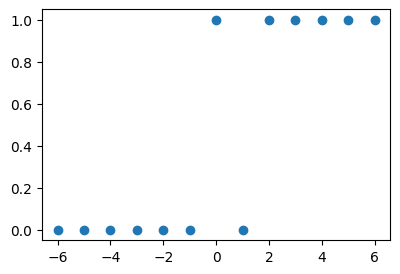

In [49]:
x = torch.tensor([-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4, 5, 6.0]).reshape(-1,1)
y = torch.tensor([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]).reshape(-1,1)
plt.plot(x,y,'o')

`-` 아래와 같이 모형화 하면?

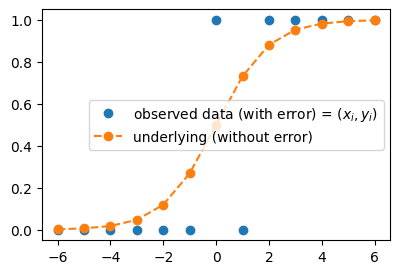

In [57]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x)/(1+torch.exp(x)),'o--', label = "underlying (without error)")
plt.legend()

## B. $\hat{\bf y} = \frac{\exp(\text{linr}({\bf X}))}{1+\exp(\text{linr}({\bf X}))}$

`-` 걱정: 산점도가 꼭 아래와 같은 방식이 아니라면 어쩌지?

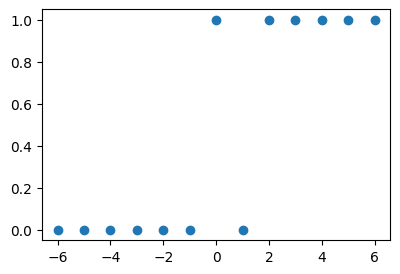

In [53]:
plt.plot(x,y,'o')

-   $x$가 증가할수록 $y$가 0이 된다면?
-   0근처에서 변화가 일어나지 않고 2근처에서 변화가 일어난다면?
-   변화가 좀 더 급하게 (혹은 완만하게 일어난다면?)

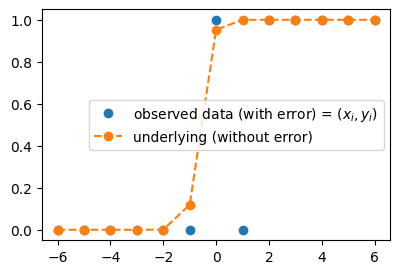

In [58]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(5*x+3)/(1+torch.exp(5*x+3)),'o--', label = "underlying (without error)")
plt.legend()

`-` 걱정해결

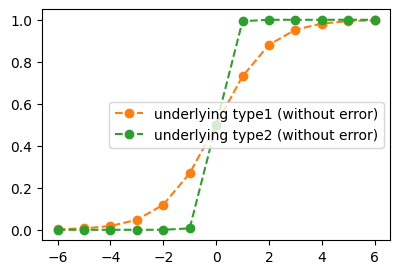

In [75]:
#plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x)/(1+torch.exp(x)),'o--', label = "underlying type1 (without error)", color="C1")
plt.plot(x,torch.exp(5*x)/(1+torch.exp(5*x)),'o--', label = "underlying type2 (without error)", color="C2")
plt.legend()

> **Note**
>
> **회귀 vs 로지스틱**
>
> -   ${\bf X} \to {\bf y}$ 에 대한 패턴이
>     $\text{linr}({\bf X}) \approx {\bf y}$ 이라면 회귀!
> -   ${\bf X} \to {\bf y}$ 에 대한 패턴이
>     $\frac{\exp(\text{linr}({\bf X}))}{1+\exp(\text{linr}({\bf X}))} \approx {\bf y}$
>     이라면 로지스틱!

## C. 로지스틱 모형

`-` $x$가 커질수록 (혹은 작아질수록) $y=1$이 잘나오는 모형은 아래와 같이
설계할 수 있음 \<— 외우세요!!!

-   $y_i \sim {\cal B}(\pi_i),\quad$ where
    $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)} = \frac{1}{1+\exp(-w_0-w_1x_i)}$

-   $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$

`-` 회귀모형과 로지스틱 모형의 비교

-   회귀모형: $y_i \sim {\cal N}(w_0+w_1x_i, \sigma^2)$[1]
-   로지스틱:
    $y_i \sim {\cal B}\big(\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}\big)$

`-` 우리가 예측하고 싶은것

-   회귀모형: 정규분포의 평균을 예측하고 싶음. 즉 $w_0+w_1x_i$를
    예측하고 싶음. 예측값으로는 $\hat{w}_0 + \hat{w}_1x_i$를 사용!
-   로지스틱: 베르누이의 평균을 예측하고 싶음. 즉
    $\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$를 예측하고 싶음.
    예측값으로는
    $\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}$를
    사용!

[1] 원래는 이렇게 썼었지..
$y_i = w_0 + w_1x_i + \epsilon_i \quad \epsilon_i \sim {\cal N}(0,\sigma^2)$